In [1151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1152]:
listings = pd.read_csv('C:/Users/kyu_k/OneDrive/Desktop/ds/Spring board DS Career track/Capstonetwo/Untitled Folder/dataclean.csv')

https://ctstatelibrary.org/cttowns/counties

In [1153]:
ct_cities = pd.read_csv('C:/Users/kyu_k/OneDrive/Desktop/ds/Spring board DS Career track/Capstonetwo/Untitled Folder/CT city data.csv',header = None)

Renaming a Column

In [1154]:
colname = listings.columns
print(colname)

Index(['Unnamed: 0', '#', 'MLS#', 'Status', 'Status Change Timestamp',
       'Prop Type', 'Address', 'City', 'Acres', 'Sq Ft Total',
       'Sq Ft Est Heated Above Grade', 'Style or Rent Type', 'Rooms Total',
       'Beds Total', 'Year Built', 'DOM', 'Listing Agent', 'List Office',
       'list_price', 'close_price', 'Full Bath', 'Half Bath', 'Garage',
       'Parking', 'Age'],
      dtype='object')


In [1155]:
newnames =['Unnamed: 0', '#', 'MLS#', 'Status', 'Status Change Timestamp',
       'Prop Type', 'Address', 'City', 'Acres', 'Sq Ft Total',
       'Sq Ft Est Heated Above Grade', 'Style', 'Rooms Total',
       'Beds Total', 'Year Built', 'DOM', 'Listing Agent', 'List Office',
       'list_price', 'close_price', 'Full Bath', 'Half Bath', 'Garage',
       'Parking', 'Age']

In [1156]:
listings.columns = newnames

# 1. Preparations

###  A. Correcting Cities and adding County

Removing cities which aren't in CT by merging a table with CT counties

In [1157]:
ct_cities = ct_cities.iloc[:,[0,1]]

In [1158]:
ct_cities.columns = ['City','County']

In [1159]:
ct_cities.head()

,City,County
0,Andover,Tolland
1,Ansonia,New Haven
2,Ashford,Windham
3,Avon,Hartford
4,Barkhamsted,Litchfield


In [1160]:
len(ct_cities.loc[:,'City'].unique())

169

In [1161]:
len(listings['City'].unique())

228

We have 58 cities which are incorrect

In [1162]:
ct_cities.loc[:,'City'].unique()

array(['Andover', 'Ansonia', 'Ashford', 'Avon', 'Barkhamsted',
       'Beacon Falls', 'Berlin', 'Bethany', 'Bethel', 'Bethlehem',
       'Bloomfield', 'Bolton', 'Bozrah', 'Branford', 'Bridgeport',
       'Bridgewater', 'Bristol', 'Brookfield', 'Brooklyn', 'Burlington',
       'Canaan', 'Canterbury', 'Canton', 'Chaplin', 'Cheshire', 'Chester',
       'Clinton', 'Colchester', 'Colebrook', 'Columbia', 'Cornwall',
       'Coventry', 'Cromwell', 'Danbury', 'Darien', 'Deep River', 'Derby',
       'Durham', 'East Granby', 'East Haddam', 'East Hampton',
       'East Hartford', 'East Haven', 'East Lyme', 'East Windsor',
       'Eastford', 'Easton', 'Ellington', 'Enfield', 'Essex', 'Fairfield',
       'Farmington', 'Franklin', 'Glastonbury', 'Goshen', 'Granby',
       'Greenwich', 'Griswold', 'Groton', 'Guilford', 'Haddam', 'Hamden',
       'Hampton', 'Hartford', 'Hartland', 'Harwinton', 'Hebron', 'Kent',
       'Killingly', 'Killingworth', 'Lebanon', 'Ledyard', 'Lisbon',
       'Litchfield', 'L

In [1163]:
listings['City'].unique()

array(['Amenia', 'Andover', 'Ansonia', 'Ashford', 'Avon', 'Barkhamsted',
       'Beacon Falls', 'Bedford', 'Beekman', 'Berlin', 'Bethany',
       'Bethel', 'Bethlehem', 'Bloomfield', 'Bolton', 'Bozrah',
       'Branford', 'Brewster', 'Bridgeport', 'Bridgewater', 'Bristol',
       'Brookfield', 'Brooklyn', 'Burlington', 'Canaan', 'Canterbury',
       'Canton', 'Carmel', 'Chaplin', 'Cheshire', 'Chester', 'Chicopee',
       'Clinton', 'Colchester', 'Cold Spring', 'Colebrook', 'Columbia',
       'Cornwall', 'Coventry', 'Cromwell', 'Croton-on-Hudson', 'Danbury',
       'Darien', 'Deep River', 'Derby', 'Douglas', 'Dover', 'Durham',
       'East Fishkill', 'Ellington', 'Enfield', 'East Granby',
       'East Haddam', 'East Hampton', 'East Hartford', 'East Haven',
       'East Lyme', 'East Windsor', 'Eastford', 'Essex',
       'East Longmeadow', 'Easton', 'Egremont', 'Greenwich', 'Fairfield',
       'Farmington', 'Glastonbury', 'Granby', 'Griswold', 'Groton',
       'Guilford', 'Fishers Island'

Using a left merge on the listing data we are identifying the cities which aren't on the CT cities list but in the Listing data

In [1164]:
values_drop = pd.merge(listings,ct_cities,on = 'City', how = 'left', indicator = True )

In [1165]:
values_drop = values_drop[values_drop['_merge']=='left_only']

In [1166]:
values_drop.shape

(162, 27)

We will be dropping 162 observations with incorrect city names.  The city names are included below

In [1167]:
values_drop['City'].unique()

array(['Amenia', 'Bedford', 'Beekman', 'Brewster', 'Carmel', 'Chicopee',
       'Cold Spring', 'Croton-on-Hudson', 'Douglas', 'Dover',
       'East Fishkill', 'East Longmeadow', 'Egremont', 'Fishers Island',
       'Foster', 'Gallatin', 'Glocester', 'Greenburgh', 'Lewisboro',
       'Hadley', 'Hampden', 'Holland', 'Kent NY', 'LaGrange',
       'Longmeadow', 'Ludlow', 'Millerton', 'Mount Washington',
       'Narragansett', 'New Marlborough', 'North Castle', 'Ossining',
       'Patterson', 'Pawling', 'Poughkeepsie', 'Pound Ridge',
       'Putnam Valley', 'Richmond', 'Somers NY', 'Rye Brook',
       'Sandisfield', 'Sheffield', 'South Kingston', 'Southbridge',
       'Tarrytown', 'Springfield', 'Southwick', 'Warwick',
       'Wappingers Falls', 'White Plains', 'West Springfield', 'Westerly',
       'Webster', 'West Stockbridge', 'Unknown MA City',
       'Unknown RI City', 'Yorktown', 'Unknown City', 'Unknown NY City'],
      dtype=object)

In [1168]:
listings.shape

(57410, 25)

An inner merge will take observations that have share city in both the listing data AND the CT city list.

In [1169]:
listings = pd.merge(listings,ct_cities,on = 'City', how = 'inner' )

In [1170]:
listings.head()

,Unnamed: 0,#,MLS#,Status,Status Change Timestamp,Prop Type,Address,City,Acres,Sq Ft Total,...,Listing Agent,List Office,list_price,close_price,Full Bath,Half Bath,Garage,Parking,Age,County
0,2,1,170378716,CLSD,05/14/21,SF,64 Long Hill Rd,Andover,0.92,1800,...,Mike Defosses,EXRE01,150000,97500,1,0,0,Off Street Parking,86.0,Tolland
1,3,1,170305413,CLSD,03/10/21,SF,560 Route 6,Andover,4.63,1724,...,Team Rio,EXRE01,119900,100000,1,0,0,Off Street Parking,73.0,Tolland
2,4,1,170365013,CLSD,04/22/21,SF,7 Bailey Rd,Andover,1.49,1138,...,Erica L Molochnick,REDB01,170000,150000,1,0,2,Detached Garage,98.0,Tolland
3,5,1,170316531,CLSD,09/02/20,SF,56 Pine Ridge Dr,Andover,0.85,1476,...,Lisa A Barstow,KWGH60,169000,180000,1,0,2,Attached Garage,64.0,Tolland
4,6,1,170359991,CLSD,03/12/21,SF,213 Route 6,Andover,0.62,1074,...,Lisa A Barstow,KWLP05,174900,182000,2,0,2,Detached Garage,82.0,Tolland


In [1171]:
listings.shape

(57248, 26)

In [1172]:
len(listings['City'].unique())

169

### B. Removing Unused columns and columns with 0 variation

In [1173]:
print([i for i in listings.columns])

['Unnamed: 0', '#', 'MLS#', 'Status', 'Status Change Timestamp', 'Prop Type', 'Address', 'City', 'Acres', 'Sq Ft Total', 'Sq Ft Est Heated Above Grade', 'Style', 'Rooms Total', 'Beds Total', 'Year Built', 'DOM', 'Listing Agent', 'List Office', 'list_price', 'close_price', 'Full Bath', 'Half Bath', 'Garage', 'Parking', 'Age', 'County']


We start by removing meaningless columns and columns containing information about Real Estate office and agent

In [1174]:
listings = listings.drop('List Office', axis =1)

In [1175]:
listings = listings.drop('Listing Agent', axis =1)

In [1176]:
listings = listings.drop('#', axis =1)

In [1177]:
listings = listings.drop('Unnamed: 0', axis =1)

Now removing columns with no variation

In [1178]:
listings['Status'].unique()

array(['CLSD'], dtype=object)

In [1179]:
listings = listings.drop('Status', axis =1)

We will separate the Condo data from the Single Family data to allow for separate exploration.  Then drop the type column

In [1180]:
print(listings['Prop Type'].value_counts())

SF    45564
CO    11438
CP      246
Name: Prop Type, dtype: int64


In [1181]:
CO_listings = listings[listings['Prop Type']=='CO']

In [1182]:
listings = listings[listings['Prop Type']=='SF']

In [1183]:
listings = listings.drop('Prop Type', axis =1)

In [1184]:
CO_listings = CO_listings.drop('Prop Type', axis =1)

In [1185]:
print(listings.head())

        MLS# Status Change Timestamp           Address     City  Acres  \
0  170378716                05/14/21   64 Long Hill Rd  Andover   0.92   
1  170305413                03/10/21       560 Route 6  Andover   4.63   
2  170365013                04/22/21       7 Bailey Rd  Andover   1.49   
3  170316531                09/02/20  56 Pine Ridge Dr  Andover   0.85   
4  170359991                03/12/21       213 Route 6  Andover   0.62   

   Sq Ft Total  Sq Ft Est Heated Above Grade     Style  Rooms Total  \
0         1800                        1800.0  Colonial            7   
1         1724                        1724.0     Ranch            6   
2         1138                        1138.0  Bungalow            6   
3         1476                         864.0     Ranch            4   
4         1074                        1074.0  Cape Cod            6   

   Beds Total  Year Built    DOM  list_price  close_price  Full Bath  \
0           3      1935.0    8.0      150000        9750

In [1186]:
listings.shape

(45564, 20)

In [1187]:
CO_listings.shape

(11438, 20)

# 2. Removing Outliers

#### Garage

In [1188]:
print(listings[listings['Garage']>10].loc[:,'Garage'].value_counts())

99999    83
12        5
11        5
13        3
14        2
18        1
17        1
Name: Garage, dtype: int64


In [1189]:
print(listings[listings['Garage']>20].describe())

           Acres  Sq Ft Total  Sq Ft Est Heated Above Grade  Rooms Total  \
count  83.000000    83.000000                     83.000000    83.000000   
mean    1.318675  1872.783133                   1772.481928     6.867470   
std     3.501713   839.568081                    835.102044     1.936624   
min     0.080000   612.000000                    612.000000     3.000000   
25%     0.195000  1297.500000                   1224.000000     6.000000   
50%     0.380000  1702.000000                   1572.000000     7.000000   
75%     0.790000  2197.000000                   2115.000000     8.000000   
max    24.800000  4641.000000                   4641.000000    14.000000   

       Beds Total   Year Built         DOM    list_price   close_price  \
count   83.000000    83.000000   83.000000  8.300000e+01  8.300000e+01   
mean     3.180723  1937.036145   57.987952  3.801157e+05  3.755169e+05   
std      0.783123    41.244791   67.670380  3.700462e+05  3.613470e+05   
min      1.000000  

In [1190]:
listings = listings[listings['Garage']<20]

In [1191]:
listings.shape

(45481, 20)

I removed 83 observations which I had coded to 99999 that had ambiguous  values for garage

## A. 1.5*IQR

https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule

standardizing removal of outliers 1.5* interquartile range

In [1192]:
listings.columns

Index(['MLS#', 'Status Change Timestamp', 'Address', 'City', 'Acres',
       'Sq Ft Total', 'Sq Ft Est Heated Above Grade', 'Style', 'Rooms Total',
       'Beds Total', 'Year Built', 'DOM', 'list_price', 'close_price',
       'Full Bath', 'Half Bath', 'Garage', 'Parking', 'Age', 'County'],
      dtype='object')

In [1193]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45481 entries, 0 to 57247
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MLS#                          45481 non-null  object 
 1   Status Change Timestamp       45481 non-null  object 
 2   Address                       45481 non-null  object 
 3   City                          45481 non-null  object 
 4   Acres                         45481 non-null  float64
 5   Sq Ft Total                   45481 non-null  int64  
 6   Sq Ft Est Heated Above Grade  45481 non-null  float64
 7   Style                         45481 non-null  object 
 8   Rooms Total                   45481 non-null  int64  
 9   Beds Total                    45481 non-null  int64  
 10  Year Built                    45481 non-null  float64
 11  DOM                           45481 non-null  float64
 12  list_price                    45481 non-null  int64  
 13  c

#### i. Acres

In [1194]:
a,b =listings['Acres'].quantile([.25,.75])
print(a,b)
iqr = b-a
print(iqr)

0.24 1.15
0.9099999999999999


In [1195]:
lower = a - (1.5*iqr)
upper = b + (1.5*iqr)
print(lower, upper)

-1.1249999999999998 2.5149999999999997


In [1196]:
def outliers(df):
    a,b =df.quantile([.25,.75])
    iqr = b-a
    print("\n25 percentile: ", a, '\n75 percentile: ', b, '\nIQR: ', iqr)
    lower = a - (1.5*iqr)
    upper = b + (1.5*iqr)
    print('Lower: ',lower,'Upper', upper)
    return((df>lower) & (df<upper))
 

In [1197]:
outlier_bool = outliers(listings['Acres'])


25 percentile:  0.24 
75 percentile:  1.15 
IQR:  0.9099999999999999
Lower:  -1.1249999999999998 Upper 2.5149999999999997


In [1198]:
listings = listings[outlier_bool]

In [1199]:
listings.shape

(41400, 20)

#### ii. Sqft Total

In [1200]:
outlier_bool = outliers(listings['Sq Ft Total'])


25 percentile:  1404.0 
75 percentile:  2650.0 
IQR:  1246.0
Lower:  -465.0 Upper 4519.0


In [1201]:
listings = listings[outlier_bool]

In [1202]:
listings.shape

(39147, 20)

#### iii. Sq Ft Est Heated Above Grade

In [1203]:
outlier_bool = outliers(listings['Sq Ft Est Heated Above Grade'])


25 percentile:  1252.0 
75 percentile:  2244.0 
IQR:  992.0
Lower:  -236.0 Upper 3732.0


In [1204]:
listings = listings[outlier_bool]

In [1205]:
listings.shape

(38264, 20)

#### iv. Rooms Total

In [1206]:
outlier_bool = outliers(listings['Rooms Total'])


25 percentile:  6.0 
75 percentile:  8.0 
IQR:  2.0
Lower:  3.0 Upper 11.0


In [1207]:
listings = listings[outlier_bool]

In [1208]:
listings.shape

(37205, 20)

#### v. Beds Total

In [1209]:
outlier_bool = outliers(listings['Beds Total'])


25 percentile:  3.0 
75 percentile:  4.0 
IQR:  1.0
Lower:  1.5 Upper 5.5


In [1210]:
listings = listings[outlier_bool]

In [1211]:
listings.shape

(36988, 20)

#### vi. List Price

In [1212]:
outlier_bool = outliers(listings['list_price'])
listings = listings[outlier_bool]
listings.shape


25 percentile:  225000.0 
75 percentile:  425000.0 
IQR:  200000.0
Lower:  -75000.0 Upper 725000.0


(34479, 20)

#### vii. Close Price

In [1213]:
outlier_bool = outliers(listings['close_price'])
listings = listings[outlier_bool]
listings.shape


25 percentile:  225000.0 
75 percentile:  395000.0 
IQR:  170000.0
Lower:  -30000.0 Upper 650000.0


(33658, 20)

#### viii. Full Bath

In [1214]:
outlier_bool = outliers(listings['Full Bath'])
listings = listings[outlier_bool]
listings.shape


25 percentile:  1.0 
75 percentile:  2.0 
IQR:  1.0
Lower:  -0.5 Upper 3.5


(33473, 20)

#### ix.  Half Bath

In [1215]:
outlier_bool = outliers(listings['Half Bath'])
listings = listings[outlier_bool]
listings.shape


25 percentile:  0.0 
75 percentile:  1.0 
IQR:  1.0
Lower:  -1.5 Upper 2.5


(33462, 20)

# 3. Distributions

In [1216]:
listings.describe()

,Acres,Sq Ft Total,Sq Ft Est Heated Above Grade,Rooms Total,Beds Total,Year Built,DOM,list_price,close_price,Full Bath,Half Bath,Garage,Age
count,33462.000000,33462.000000,33462.000000,33462.000000,33462.000000,33462.000000,33462.000000,33462.000000,33462.000000,33462.000000,33462.000000,33462.000000,33462.000000
mean,0.591166,1838.872542,1656.403951,6.707190,3.217351,1957.302552,41.559977,307286.444624,310394.221087,1.697806,0.493724,1.297113,63.697448
std,0.525112,665.633840,580.206087,1.378808,0.667353,35.267381,60.649284,121540.363850,121487.647460,0.633112,0.538030,0.908768,35.267381
min,0.010000,480.000000,396.000000,4.000000,2.000000,1660.000000,0.000000,10000.000000,10500.000000,0.000000,0.000000,0.000000,0.000000
25%,0.220000,1332.000000,1220.000000,6.000000,3.000000,1946.000000,5.000000,219900.000000,221999.250000,1.000000,0.000000,1.000000,43.000000
50%,0.380000,1720.000000,1514.000000,7.000000,3.000000,1959.000000,21.000000,280000.000000,285000.000000,2.000000,0.000000,1.000000,62.000000
75%,0.850000,2224.000000,2000.000000,8.000000,4.000000,1978.000000,60.000000,379900.000000,384975.000000,2.000000,1.000000,2.000000,75.000000
max,2.510000,4512.000000,3731.000000,10.000000,5.000000,2021.000000,2009.000000,722000.000000,649900.000000,3.000000,2.000000,14.000000,361.000000


   ###  A. City

Waterbury        1065
West Hartford     805
Stratford         790
Hamden            777
Bridgeport        741
Bristol           715
Milford           644
Meriden           617
Manchester        607
Enfield           595
East Hartford     582
West Haven        571
Southington       561
Norwalk           556
Middletown        518
New Britain       512
Trumbull          505
Torrington        501
Stamford          494
Danbury           489
Name: City, dtype: int64


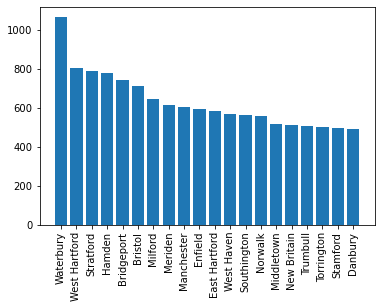

In [1217]:
topcities = listings['City'].value_counts().sort_values(ascending=False).head(20)
print(topcities)


barx = topcities.index.values


plt.bar(barx,
        listings['City'].value_counts().head(20))

plt.xticks(rotation = 90)
plt.show()

Hartford      9026
New Haven     8389
Fairfield     6285
New London    2908
Litchfield    2195
Middlesex     2014
Tolland       1515
Windham       1130
Name: County, dtype: int64


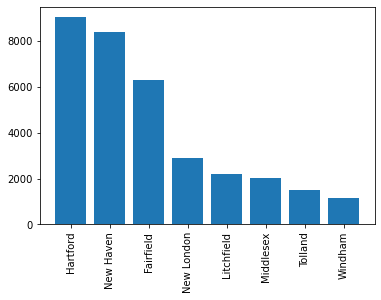

In [1218]:
topcounty = listings['County'].value_counts().sort_values(ascending=False)
print(topcounty)


barx = topcounty.index.values


plt.bar(barx, listings['County'].value_counts())

plt.xticks(rotation = 90)
plt.show()



### B. Acres


In [1219]:
print(listings['Acres'].describe())

count    33462.000000
mean         0.591166
std          0.525112
min          0.010000
25%          0.220000
50%          0.380000
75%          0.850000
max          2.510000
Name: Acres, dtype: float64


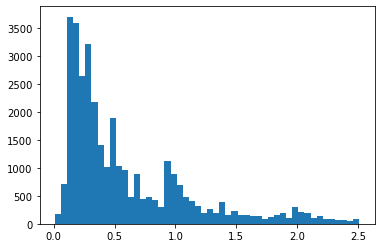

In [1220]:
plt.hist(listings['Acres'], bins =50)
plt.show()

In [1221]:
print(listings['Acres'].value_counts().head(20))

0.17    1070
0.23     850
0.11     800
0.14     772
0.18     721
0.46     669
0.21     644
0.28     641
0.29     640
0.26     622
0.22     608
0.16     606
0.24     593
1.00     591
0.25     586
0.19     584
0.20     573
0.34     554
0.35     546
0.15     537
Name: Acres, dtype: int64


### C. Sqft Total

In [1222]:
print(listings['Sq Ft Total'].describe())

count    33462.000000
mean      1838.872542
std        665.633840
min        480.000000
25%       1332.000000
50%       1720.000000
75%       2224.000000
max       4512.000000
Name: Sq Ft Total, dtype: float64


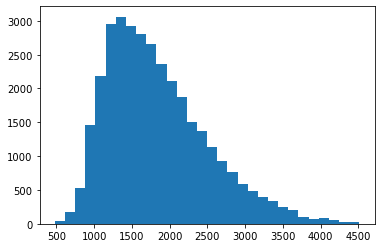

In [1223]:
plt.hist(listings['Sq Ft Total'], bins =30)
plt.show()

log normal? natural log transformation

### D. Sq Ft Est Heated Above Grade

In [1224]:
print(listings['Sq Ft Est Heated Above Grade'].describe())

count    33462.000000
mean      1656.403951
std        580.206087
min        396.000000
25%       1220.000000
50%       1514.000000
75%       2000.000000
max       3731.000000
Name: Sq Ft Est Heated Above Grade, dtype: float64


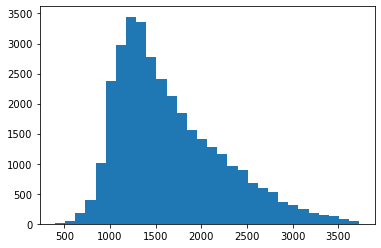

In [1225]:
plt.hist(listings['Sq Ft Est Heated Above Grade'],bins = 30)
plt.show()

### E. Style

In [1226]:
listings['Style'].value_counts()

Colonial             10958
Ranch                 8638
Cape Cod              7226
Raised Ranch          3186
Split Level           1373
Contemporary           873
Bungalow               372
Other                  164
Cottage                117
Antique                115
Half Duplex             98
Farm House              89
Hi-Ranch                67
Victorian               65
Tudor                   21
Row House               21
Saltbox                 20
Mobile Home             16
Log                     13
Barn                    10
A-Frame                  8
Modern                   5
Chalet                   3
Georgian Colonial        1
Garden Ranch             1
European                 1
Chateau                  1
Name: Style, dtype: int64

Colonial        10958
Ranch            8638
Cape Cod         7226
Raised Ranch     3186
Split Level      1373
Contemporary      873
Name: Style, dtype: int64


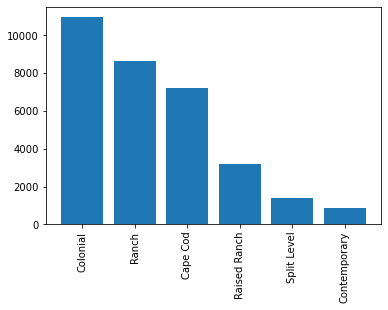

In [1227]:
topstyle = listings['Style'].value_counts().sort_values(ascending=False).head(6)
print(topstyle)


barx = topstyle.index.values


plt.bar(barx,
        listings['Style'].value_counts().head(6))

plt.xticks(rotation = 90)
plt.show()


### F. Rooms Total

In [1228]:
print(listings['Rooms Total'].describe())

count    33462.000000
mean         6.707190
std          1.378808
min          4.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: Rooms Total, dtype: float64


6     9741
7     8090
8     5511
5     5332
9     2638
4     1105
10    1045
Name: Rooms Total, dtype: int64


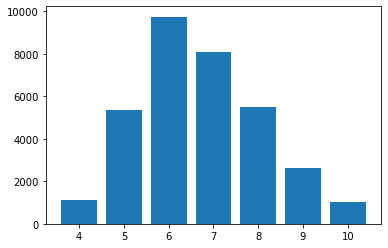

In [1229]:
barvalue = listings['Rooms Total'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)

plt.show()



### G. Beds Total

In [1230]:
print(listings['Beds Total'].describe())

count    33462.000000
mean         3.217351
std          0.667353
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Beds Total, dtype: float64


3    19760
4     9097
2     3678
5      927
Name: Beds Total, dtype: int64


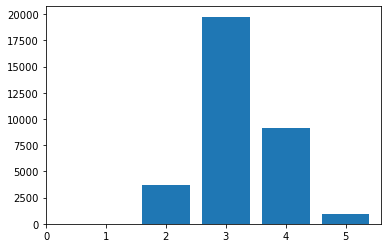

In [1231]:
barvalue = listings['Beds Total'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)
plt.xticks((range(6)))
plt.show()


### H. Year Built

In [1232]:
print(listings['Year Built'].describe())

count    33462.000000
mean      1957.302552
std         35.267381
min       1660.000000
25%       1946.000000
50%       1959.000000
75%       1978.000000
max       2021.000000
Name: Year Built, dtype: float64


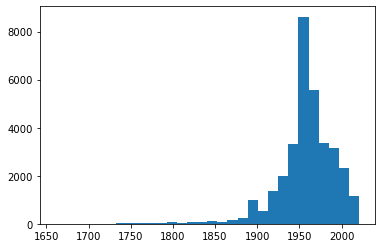

In [1233]:
plt.hist(listings['Year Built'], bins =30)
plt.show()

### I. Days on Market

In [1234]:
print(listings['DOM'].describe())

count    33462.000000
mean        41.559977
std         60.649284
min          0.000000
25%          5.000000
50%         21.000000
75%         60.000000
max       2009.000000
Name: DOM, dtype: float64


In [1235]:
print(listings['DOM'].value_counts().head(20))

3.0     2550
4.0     2146
2.0     2086
5.0     1470
6.0     1065
1.0      971
7.0      781
8.0      597
9.0      494
10.0     463
12.0     427
11.0     408
0.0      380
13.0     379
65.0     374
21.0     350
64.0     341
15.0     335
18.0     333
14.0     330
Name: DOM, dtype: int64


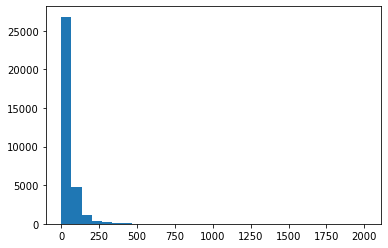

In [1236]:
plt.hist(listings['DOM'],bins = 30)
plt.show()

### J .Listing Price

In [1237]:
print(listings['list_price'].describe())

count     33462.000000
mean     307286.444624
std      121540.363850
min       10000.000000
25%      219900.000000
50%      280000.000000
75%      379900.000000
max      722000.000000
Name: list_price, dtype: float64


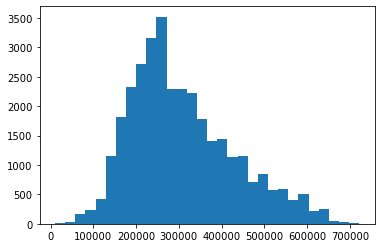

In [1238]:
plt.hist(listings['list_price'], bins =30)
plt.show()

### K. Closing Price

In [1239]:
print(listings['close_price'].describe())

count     33462.000000
mean     310394.221087
std      121487.647460
min       10500.000000
25%      221999.250000
50%      285000.000000
75%      384975.000000
max      649900.000000
Name: close_price, dtype: float64


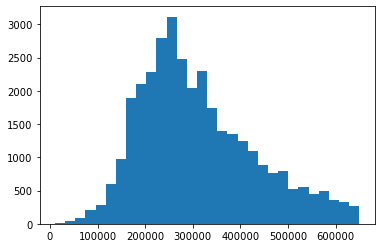

In [1240]:
plt.hist(listings['close_price'], bins =30)
plt.show()

### L. Full Bath

In [1241]:
print(listings['Full Bath'].describe())

count    33462.000000
mean         1.697806
std          0.633112
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Full Bath, dtype: float64


2    17006
1    13278
3     3174
0        4
Name: Full Bath, dtype: int64


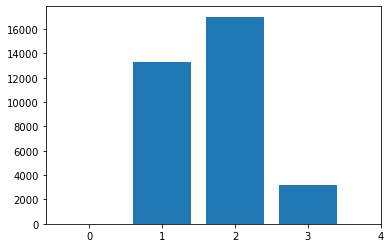

In [1242]:
barvalue = listings['Full Bath'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)
plt.xticks((range(5)))
plt.show()


### M. Half Bath

In [1243]:
print(listings['Half Bath'].describe())

count    33462.000000
mean         0.493724
std          0.538030
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Half Bath, dtype: float64


0    17602
1    15199
2      661
Name: Half Bath, dtype: int64


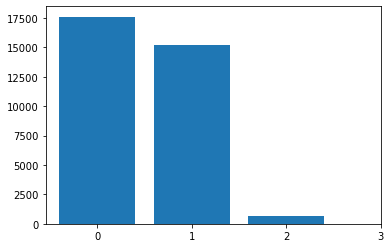

In [1244]:
barvalue = listings['Half Bath'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)
plt.xticks((range(4)))
plt.show()


### Garage

2     14739
1      9647
0      7804
3       960
4       233
5        43
6        24
8         6
7         2
14        1
12        1
11        1
9         1
Name: Garage, dtype: int64


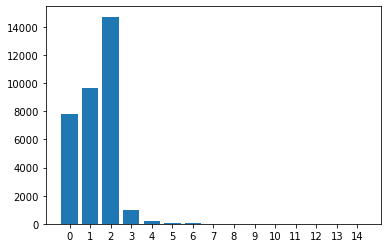

In [1245]:
barvalue = listings['Garage'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)
plt.xticks((range(15)))
plt.show()


sqft total == sqft heated? 
count/ total = percentage ?

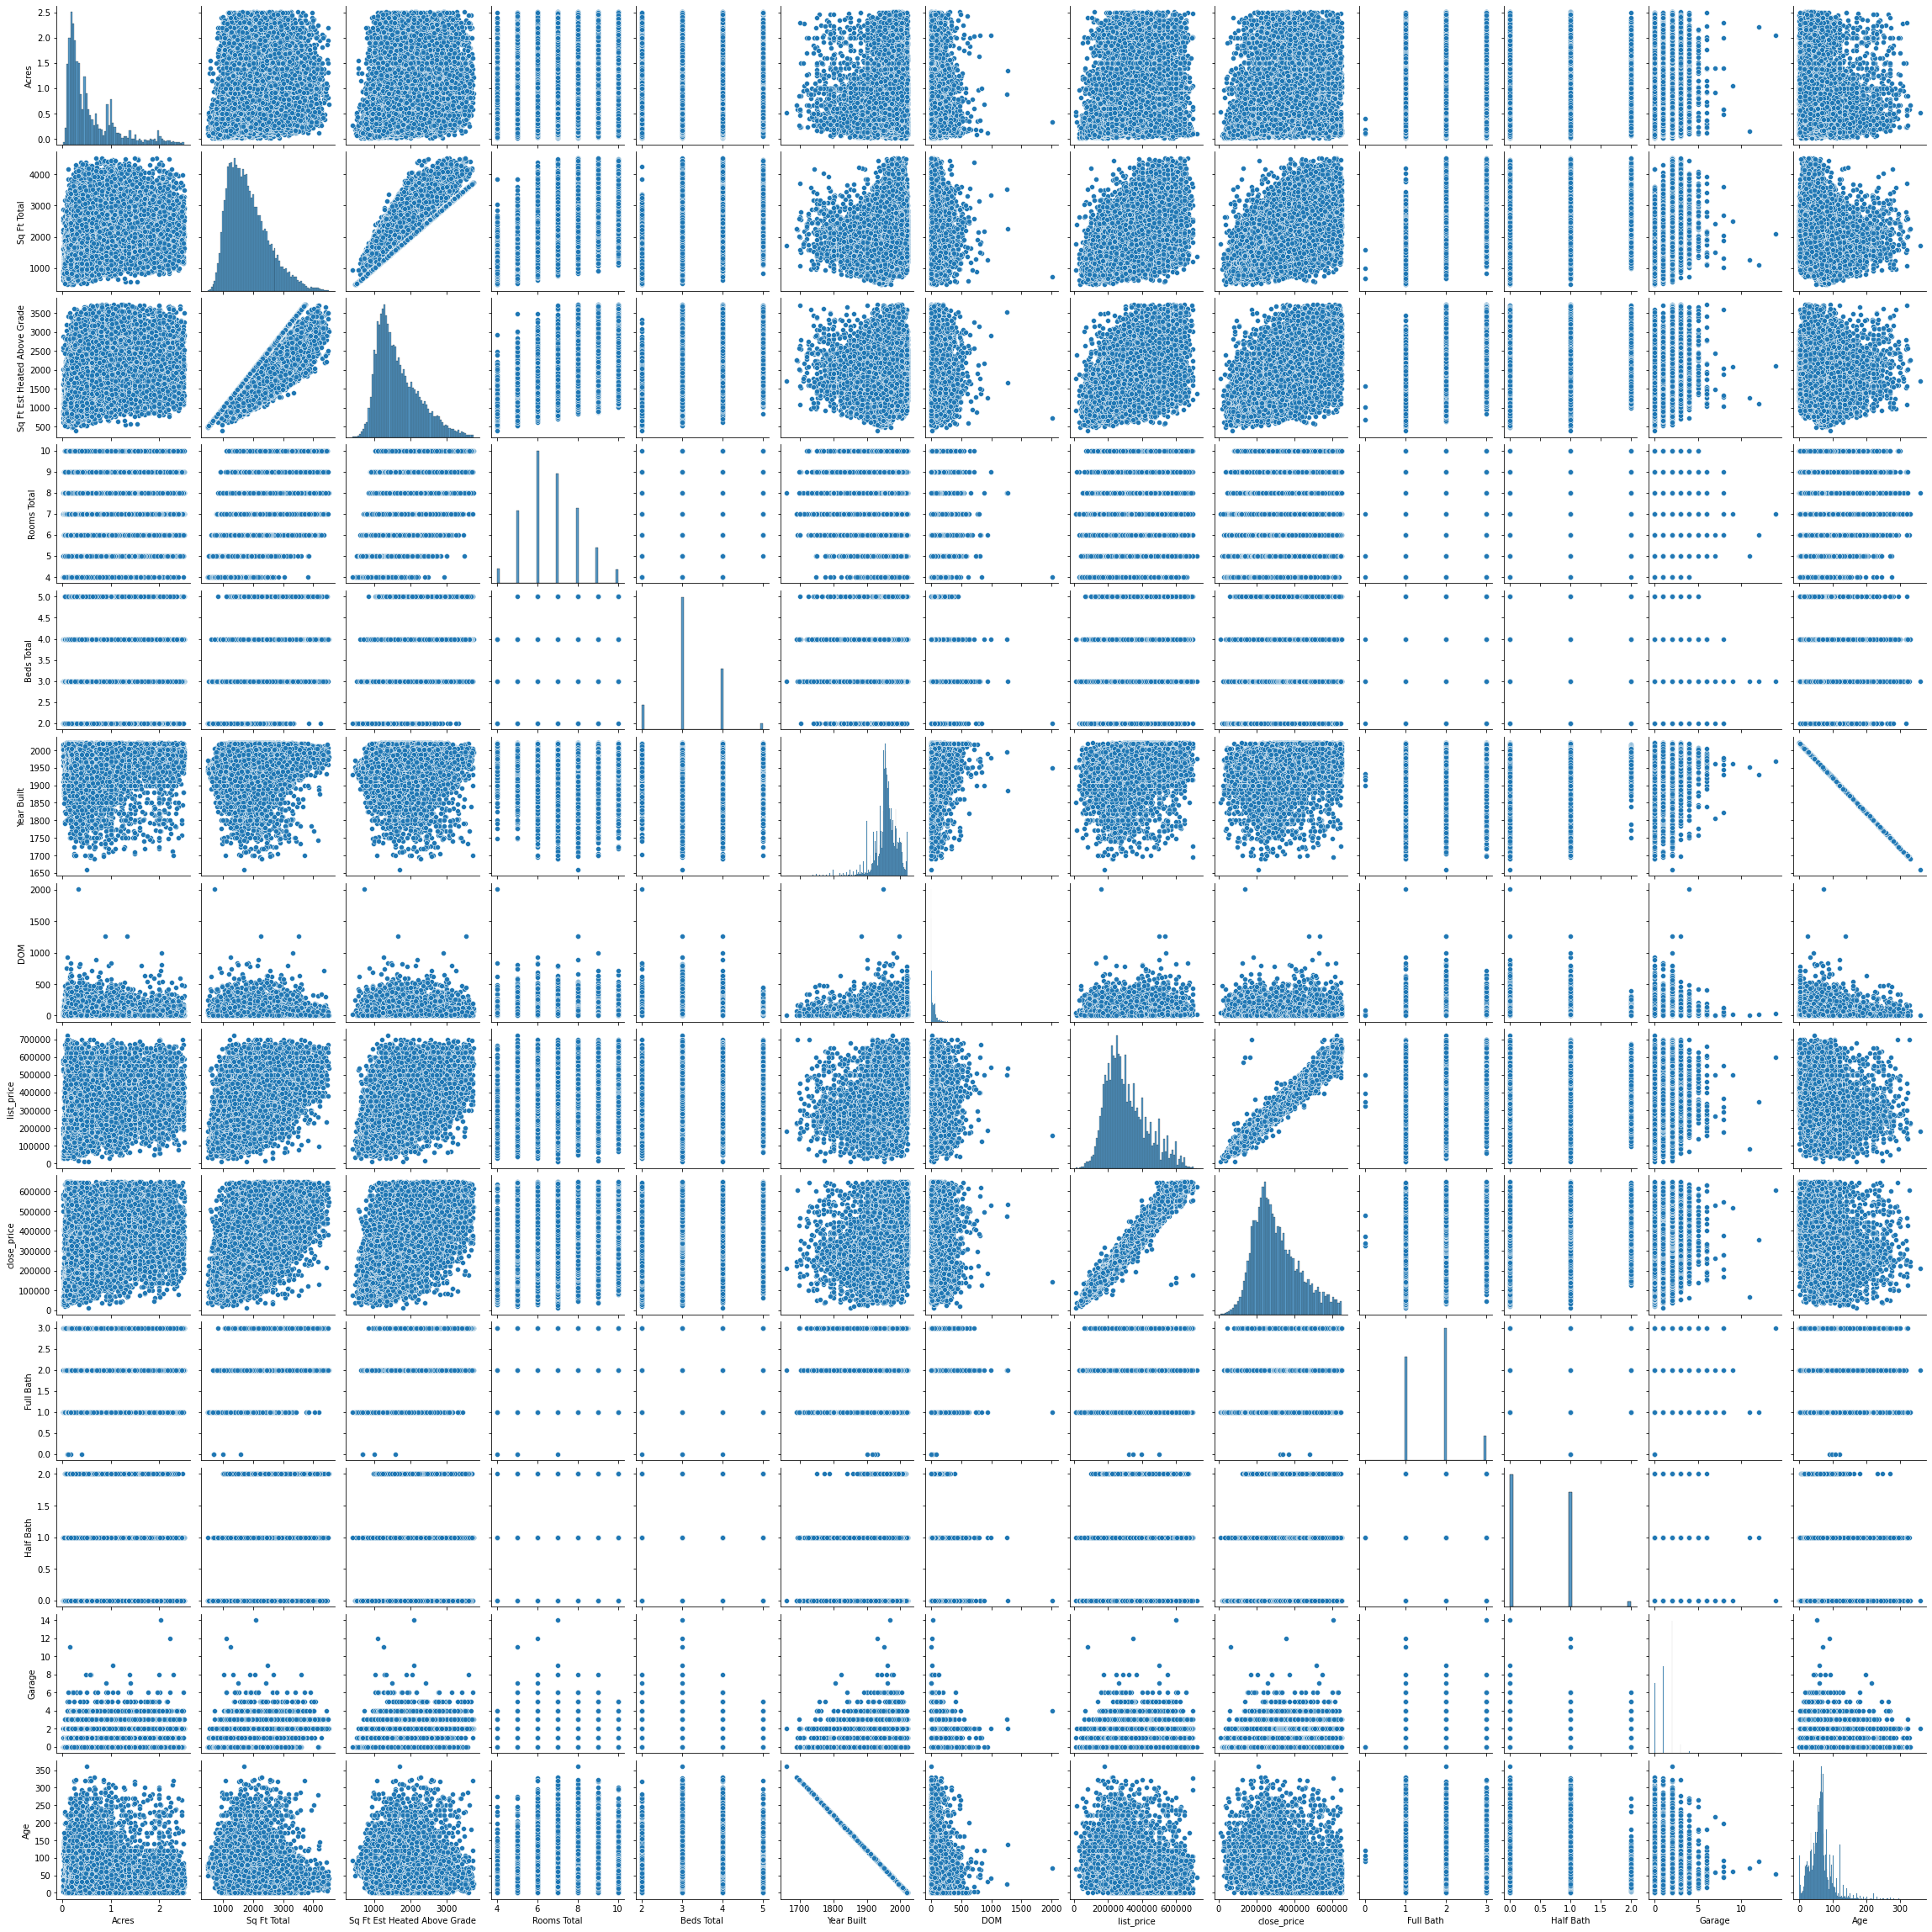

In [1246]:
sns.pairplot(listings)
plt.show()

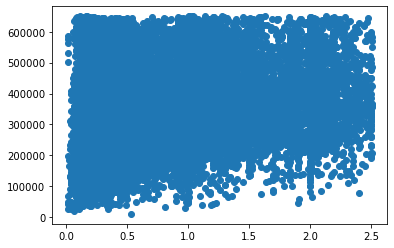

In [1247]:
plt.scatter(listings.loc[listings['Acres']<10,'Acres'],listings.loc[listings['Acres']<10,'close_price'])

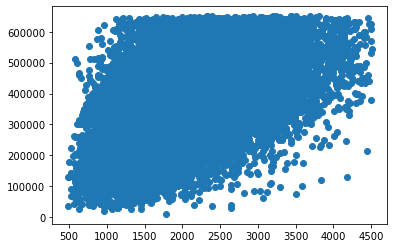

In [1248]:
plt.scatter(listings['Sq Ft Total'],listings['close_price'])

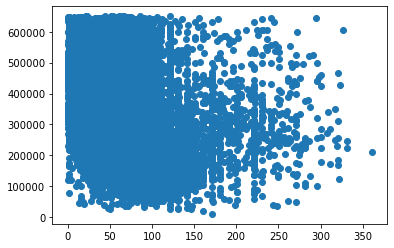

In [1249]:
plt.scatter(listings['Age'],listings['close_price'])

In [1250]:
listings['Age'].corr(listings['close_price'])

-0.27174297596422636

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

for correlation testing